<a href="https://colab.research.google.com/github/GabrielDalBen/Bootcamp-DataScience/blob/main/Desafios_aula_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Bibliotecas

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import numpy as np

#Organização e importação dos dados

In [152]:
dados = pd.read_csv("/content/A142052189_28_143_208.csv", encoding="ISO-8859-1", skiprows=3, sep=";", skipfooter=12, thousands='.',decimal=',', engine='python')
pd.options.display.float_format = "{:.2f}".format
dados.head()

,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,1995/Jan,1995/Mar,1995/Jun,1995/Ago,1995/Dez,1996/Fev,1996/Mar,1996/Ago,1996/Dez,1997/Fev,1997/Nov,1998/Fev,1998/Mar,1998/Jul,1998/Ago,1998/Set,1998/Out,1998/Dez,1999/Fev,1999/Mar,1999/Mai,1999/Jul,1999/Ago,1999/Set,1999/Out,1999/Nov,1999/Dez,2000/Jan,2000/Fev,2000/Mar,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,11 Rondônia,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8327665.97,8431334.62,7251287.20,7490440.60,8957706.45,10993332.84,10479989.36,11433467.56,8876900.39,8167253.19,8759013.71,9003402.23,8414690.60,6039419.59,4732441.04,996411254.68
1,12 Acre,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3276790.55,2985763.71,2939675.20,2672857.33,2940827.86,3914823.86,4053085.41,3658265.59,3470409.45,3267918.69,3393958.27,3711660.71,3005561.16,2272733.90,1137341.65,450048530.47
2,13 Amazonas,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15351607.47,16339427.95,14821977.50,14965815.90,15982353.42,15166470.82,14815958.58,16379386.07,19625325.21,18433057.47,19303743.16,18687233.58,18628627.49,18728251.20,20451573.77,21546059.48,24439059.57,13679358.06,6799060.80,1917247936.05
3,14 Roraima,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,2740952.07,2478349.44,2674958.94,2721261.19,2844811.66,2967161.35,2841587.97,3328230.63,2878691.04,2964324.32,2524712.40,2462451.64,2662240.18,2499996.16,2846135.56,2789823.29,2839389.53,2647540.20,2865777.71,3181321.82,3070436.96,3162342.44,3121104.71,2889969.87,3084561.08,2967159.04,2813954.05,2306119.95,2921522.16,3300012.98,3192075.41,3262354.34,2978629.22,3313296.78,3527263.23,3125021.90,3209323.68,3044798.77,2381844.31,328876965.09
4,15 Pará,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,33615836.09,30623491.62,34121931.00,35039954.20,35424611.06,34160283.18,34484949.49,35618364.04,34380916.90,38441090.50,33583538.08,32789354.87,34513534.80,31885919.67,33236155.79,31008924.95,31064106.50,28543179.30,36713929.36,36462011.47,36792954.02,36984314.60,35579251.49,35247659.30,37046350.76,34683341.17,34908420.50,29184688.30,43327731.71,40994545.21,40496349.97,38793393.54,36965951.76,38406616.21,37043032.10,36914437.92,33887773.65,23343222.94,13069564.31,4705309002.29


In [153]:
colunas_usaveis = dados.mean().index.tolist()
colunas_usaveis.insert(0,'Unidade da Federação')
usaveis = dados[colunas_usaveis]
usaveis.head()

,Unidade da Federação,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,...,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8327665.97,8431334.62,7251287.20,7490440.60,8957706.45,10993332.84,10479989.36,11433467.56,8876900.39,8167253.19,8759013.71,9003402.23,8414690.60,6039419.59,4732441.04,996411254.68
1,12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,...,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3276790.55,2985763.71,2939675.20,2672857.33,2940827.86,3914823.86,4053085.41,3658265.59,3470409.45,3267918.69,3393958.27,3711660.71,3005561.16,2272733.90,1137341.65,450048530.47
2,13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,...,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15351607.47,16339427.95,14821977.50,14965815.90,15982353.42,15166470.82,14815958.58,16379386.07,19625325.21,18433057.47,19303743.16,18687233.58,18628627.49,18728251.20,20451573.77,21546059.48,24439059.57,13679358.06,6799060.80,1917247936.05
3,14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,...,2740952.07,2478349.44,2674958.94,2721261.19,2844811.66,2967161.35,2841587.97,3328230.63,2878691.04,2964324.32,2524712.40,2462451.64,2662240.18,24999

In [154]:
usaveis = usaveis.set_index('Unidade da Federação')
usaveis.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,4423840.08,...,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8327665.97,8431334.62,7251287.20,7490440.60,8957706.45,10993332.84,10479989.36,11433467.56,8876900.39,8167253.19,8759013.71,9003402.23,8414690.60,6039419.59,4732441.04,996411254.68
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,2512995.15,...,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3276790.55,2985763.71,2939675.20,2672857.33,2940827.86,3914823.86,4053085.41,3658265.59,3470409.45,3267918.69,3393958.27,3711660.71,3005561.16,2272733.90,1137341.65,450048530.47
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,9532878.27,...,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15351607.47,16339427.95,14821977.50,14965815.90,15982353.42,15166470.82,14815958.58,16379386.07,19625325.21,18433057.47,19303743.16,18687233.58,18628627.49,18728251.20,20451573.77,21546059.48,24439059.57,13679358.06,6799060.80,1917247936.05
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,1528245.34,...,2740952.07,2478349.44,

In [155]:
usaveis_total = usaveis.sort_values('Total', ascending=False)
usaveis_total = usaveis_total.drop('Total', axis=1)
usaveis_total.head()


,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,1665349.90,4434168.64,14577395.84,35032259.98,76668547.41,1038067423.15,172961999.58,170556696.16,170338163.23,172462057.87,175492995.85,179569910.06,180005050.15,180151656.17,191859884.40,190927266.19,177093923.51,192412059.08,178641284.75,217011730.99,215128107.89,212905217.48,212715455.71,214079357.56,215265625.54,214249871.52,216117145.69,209183971.87,192157037.74,213512793.72,195787926.41,239411372.83,221202929.85,231922777.54,224043808.74,224157730.03,248761855.09,224121038.86,239354185.52,225639053.93,...,259637865.62,279651701.80,254219071.83,285347367.95,286371908.91,291679087.16,279102175.09,286151216.15,295669082.46,277685593.12,302766551.12,278268419.72,266770321.19,291893655.29,268083525.99,287154994.64,292870544.04,309140915.40,281621767.01,307195118.45,303584114.00,294084067.68,303866355.88,282791833.07,273357491.41,303865927.27,272050698.90,277938674.53,255178741.12,314276263.03,328293581.02,361986896.25,350268671.25,338872478.49,328055822.63,324599773.40,326846228.95,324115425.70,268193064.06,177408317.71
31 Minas Gerais,971394.37,2861781.50,10018011.35,21730281.63,43429517.54,206208080.90,70301089.50,79119005.51,79046322.41,79268070.12,79619189.20,82209206.98,80374117.08,82409129.30,88613476.60,84486996.11,88928630.30,99018155.84,83675119.83,100258616.86,91831325.37,97289703.07,95723396.53,100050008.70,98977184.26,98202119.08,96962394.27,94767639.13,92412770.73,95806556.42,90764890.28,107389850.03,100835953.45,105494550.31,99666115.96,103365357.52,107844259.69,104341138.19,100525403.88,101943625.50,...,138366640.55,146510600.58,130734031.29,151506781.86,150702572.27,153604880.55,150262499.13,156721912.31,160484918.69,145998611.06,157294586.62,148172783.99,145422406.28,153236422.57,142690772.52,151976196.81,157957866.20,163641094.76,154174153.49,166775913.85,161774658.77,157437833.94,166165125.18,152171503.07,152473281.15,158265777.55,141463360.42,147654942.70,127447290.37,142746287.34,157276616.50,177466638.10,182176122.99,181422500.43,174585638.28,168564708.16,166376967.67,155064483.25,119877417.15,79780838.00
41 Paraná,554800.22,1431708.01,4630402.44,11120030.79,28790722.87,58081334.45,48855046.46,55611791.07,56115135.82,55574831.93,56094754.74,59802402.07,56699001.13,58091985.79,61365941.22,59667208.62,57816197.74,60381593.99,57239101.63,69070488.20,64054678.26,68685542.95,67931227.06,70958762.64,69225783.96,67849968.52,68558209.28,67158496.97,63094274.28,66902643.63,64501133.64,77138870.60,70755396.99,73456756.71,71839020.89,73013830.77,76151006.95,74240963.45,73042386.70,76364750.27,...,105558123.29,116133193.49,107075982.24,122331354.51,124731345.17,127083090.02,122616924.02,127991900.80,131257163.40,120647377.43,129530163.96,121810669.26,112984630.73,124159239.68,117715473.32,123907372.22,127464502.39,132608039.80,124865873.14,134708659.18,127174381.95,126203976.57,133870601.68,126221140.81,113573832.72,122330101.96,116125740.39,114776571.27,97784060.57,111012770.38,115203716.64,123856640.55,125089468.62,121771167.11,127506086.52,133443307.36,122146256.92,106948897.53,83130175.37,43480729.07
43 Rio Grande do Sul,1049252.33,3182913.14,8571312.11,16592432.80,30134255.70,51064610.0

#Desafio 01: Escolher uma palete de cores mais adequada do matplotlib.

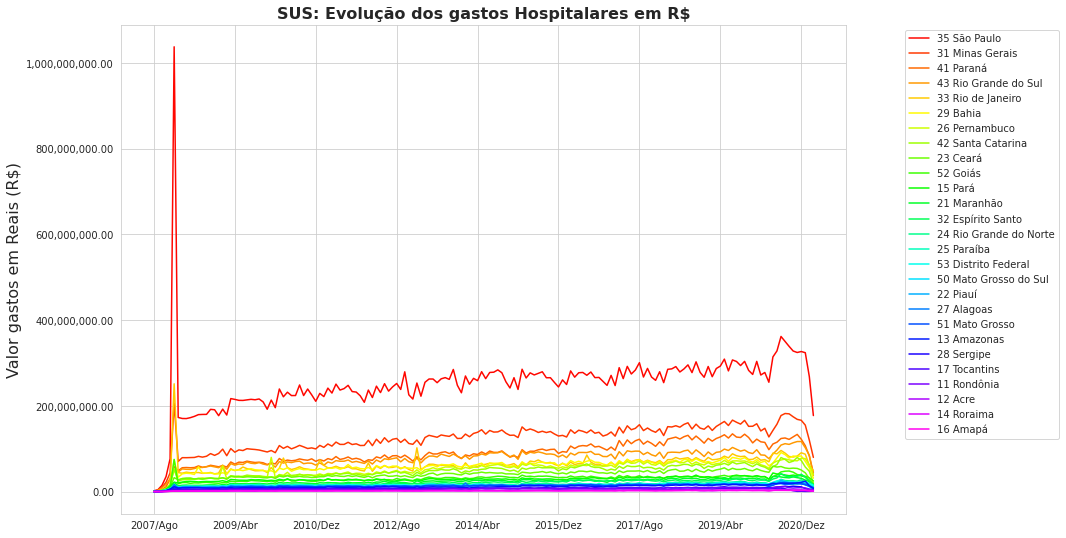

In [223]:
#Criando o gráfico
ax = usaveis_total.T.plot(figsize=(13,9))

#Organizando a legenda e os tickers do eixo y
ax.legend(loc='best', bbox_to_anchor=(0.8, 0.5, 0.5, 0.5))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

#selecionando a paleta de cores
sns.set_palette(sns.color_palette("gist_rainbow", 27))

#definindo o estido do fundo do gráfico
ax = sns.set_style("whitegrid")

#Editando as legendas
plt.title("SUS: Evolução dos gastos Hospitalares em R$", size=16, weight='bold' )
plt.ylabel("Valor gastos em Reais (R$)", size = 16)

#Plotando a imagem
plt.show()


#Desafio 02: Adicionar uma coluna mostrando a região (Norte, Nodeste, Sul, Suldeste e Centro-Oeste) de cada estado.

In [224]:
#Criando uma lista vazia para receber as regioes
regioes = []

#criando os loops para localizar os números e substituir pela região
for estados in usaveis.index:
  #Se achar o numero 1 no começo da coluna index Norte é adicionado a lista
  if estados.startswith('1'):
    regioes.append('Norte')
  #Se achar o numero 2 no começo da coluna index Nordeste é adicionado a lista
  elif estados.startswith('2'):
    regioes.append('Nordeste')
  #Se achar o numero 3 no começo da coluna index Sudeste é adicionado a lista
  elif estados.startswith('3'):
    regioes.append('Sudeste')
  #Se achar o numero 4 no começo da coluna index Sul é adicionado a lista
  elif estados.startswith('4'):
    regioes.append('Sul')
  #O resto, no caso numero 5, Centro-Oeeste é adicionado na lista
  else:
    regioes.append('Centro-Oeste')

#Inserir a coluna nova regioes na coluna 0
usaveis.insert(0, 'Regiões', regioes)

usaveis.head()


,Regiões,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,Norte,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,...,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8327665.97,8431334.62,7251287.20,7490440.60,8957706.45,10993332.84,10479989.36,11433467.56,8876900.39,8167253.19,8759013.71,9003402.23,8414690.60,6039419.59,4732441.04,996411254.68
12 Acre,Norte,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,...,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3276790.55,2985763.71,2939675.20,2672857.33,2940827.86,3914823.86,4053085.41,3658265.59,3470409.45,3267918.69,3393958.27,3711660.71,3005561.16,2272733.90,1137341.65,450048530.47
13 Amazonas,Norte,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,...,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15351607.47,16339427.95,14821977.50,14965815.90,15982353.42,15166470.82,14815958.58,16379386.07,19625325.21,18433057.47,19303743.16,18687233.58,18628627.49,18728251.20,20451573.77,21546059.48,24439059.57,13679358.06,6799060.80,1917247936.05
14 Roraima,Norte,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,...,2740952.07,2478349.44,2674958.94,2721261.19

#Desafio 03: Formatar o gráfico de custos por mês dos 5 estados, deixando ele agradável (Bonitão, segundo o Gui)

In [113]:
# usando a matriz ordenada pelos maiores orçamentos. Retirar o ruido encontrado nos primeiros meses
usaveis_total_limpa = usaveis_total.columns[6:]

usaveis_final = usaveis_total[usaveis_total_limpa]

In [114]:
usaveis_final.head()

,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,...,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,172961999.58,170556696.16,170338163.23,172462057.87,175492995.85,179569910.06,180005050.15,180151656.17,191859884.40,190927266.19,177093923.51,192412059.08,178641284.75,217011730.99,215128107.89,212905217.48,212715455.71,214079357.56,215265625.54,214249871.52,216117145.69,209183971.87,192157037.74,213512793.72,195787926.41,239411372.83,221202929.85,231922777.54,224043808.74,224157730.03,248761855.09,224121038.86,239354185.52,225639053.93,210710879.63,229146880.12,221660000.41,241445575.82,229920625.55,250817406.39,...,259637865.62,279651701.80,254219071.83,285347367.95,286371908.91,291679087.16,279102175.09,286151216.15,295669082.46,277685593.12,302766551.12,278268419.72,266770321.19,291893655.29,268083525.99,287154994.64,292870544.04,309140915.40,281621767.01,307195118.45,303584114.00,294084067.68,303866355.88,282791833.07,273357491.41,303865927.27,272050698.90,277938674.53,255178741.12,314276263.03,328293581.02,361986896.25,350268671.25,338872478.49,328055822.63,324599773.40,326846228.95,324115425.70,268193064.06,177408317.71
31 Minas Gerais,70301089.50,79119005.51,79046322.41,79268070.12,79619189.20,82209206.98,80374117.08,82409129.30,88613476.60,84486996.11,88928630.30,99018155.84,83675119.83,100258616.86,91831325.37,97289703.07,95723396.53,100050008.70,98977184.26,98202119.08,96962394.27,94767639.13,92412770.73,95806556.42,90764890.28,107389850.03,100835953.45,105494550.31,99666115.96,103365357.52,107844259.69,104341138.19,100525403.88,101943625.50,99538953.60,107766131.57,103149387.49,111077091.84,106094329.28,115487199.35,...,138366640.55,146510600.58,130734031.29,151506781.86,150702572.27,153604880.55,150262499.13,156721912.31,160484918.69,145998611.06,157294586.62,148172783.99,145422406.28,153236422.57,142690772.52,151976196.81,157957866.20,163641094.76,154174153.49,166775913.85,161774658.77,157437833.94,166165125.18,152171503.07,152473281.15,158265777.55,141463360.42,147654942.70,127447290.37,142746287.34,157276616.50,177466638.10,182176122.99,181422500.43,174585638.28,168564708.16,166376967.67,155064483.25,119877417.15,79780838.00
41 Paraná,48855046.46,55611791.07,56115135.82,55574831.93,56094754.74,59802402.07,56699001.13,58091985.79,61365941.22,59667208.62,57816197.74,60381593.99,57239101.63,69070488.20,64054678.26,68685542.95,67931227.06,70958762.64,69225783.96,67849968.52,68558209.28,67158496.97,63094274.28,66902643.63,64501133.64,77138870.60,70755396.99,73456756.71,71839020.89,73013830.77,76151006.95,74240963.45,73042386.70,76364750.27,70517638.39,74712784.07,71314740.25,76914668.09,74232937.37,81709021.05,...,105558123.29,116133193.49,107075982.24,122331354.51,124731345.17,127083090.02,122616924.02,127991900.80,131257163.40,120647377.43,129530163.96,121810669.26,112984630.73,124159239.68,117715473.32,123907372.22,127464502.39,132608039.80,124865873.14,134708659.18,127174381.95,126203976.57,133870601.68,126221140.81,113573832.72,122330101.96,116125740.39,114776571.27,97784060.57,111012770.38,115203716.64,123856640.55,125089468.62,121771167.11,127506086.52,133443307.36,122146256.92,106948897.53,83130175.37,43480729.07
43 Rio Grande do Sul,45897704.82,52928695.92,51972416.77,51679350.79,53

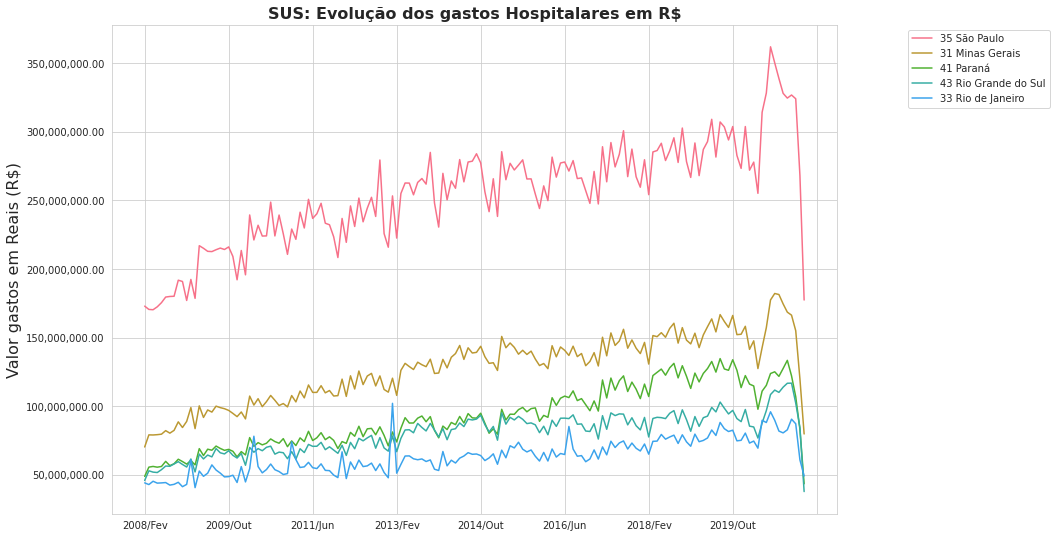

In [148]:
#Criando o gráfico
ax = usaveis_final.head().T.plot(figsize=(13,9))

#Organizando a legenda e os tickers do eixo y
ax.legend(loc='best', bbox_to_anchor=(0.8, 0.5, 0.5, 0.5))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

#selecionando a paleta de cores
sns.set_palette(sns.color_palette("husl"))

#definindo o estido do fundo do gráfico
ax = sns.set_style("whitegrid")

#Editando as legendas
plt.title("SUS: Evolução dos gastos Hospitalares em R$", size=16, weight='bold' )
plt.ylabel("Valor gastos em Reais (R$)", size = 16)

#Plotando a imagem
plt.show()


#Desafio 04: Adicione o seu estado aos 5 estados plotados anteriormente

In [116]:
#Adicionando o estado do Espírito Santo na análise junto aos estados de maior orçamento 

estados = usaveis_final.loc [['32 Espírito Santo', '33 Rio de Janeiro',
                              '35 São Paulo', '31 Minas Gerais', '41 Paraná', '43 Rio Grande do Sul']]


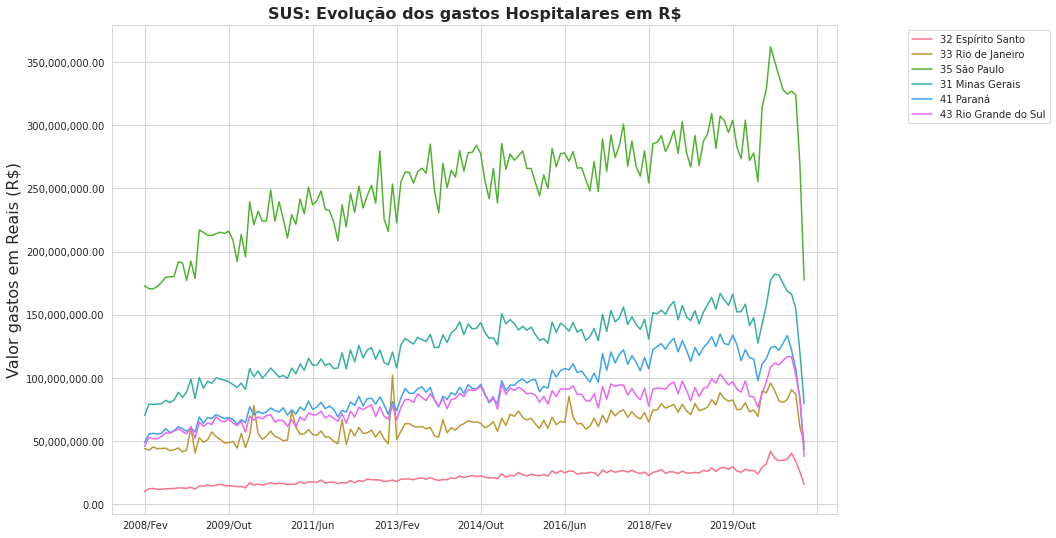

In [147]:
#Criando o gráfico
ax = estados.T.plot(figsize=(13,9))

#Organizando a legenda e os tickers do eixo y
ax.legend(loc='best', bbox_to_anchor=(0.8, 0.5, 0.5, 0.5))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

#selecionando a paleta de cores
sns.set_palette(sns.color_palette("husl"))

#definindo o estido do fundo do gráfico
ax = sns.set_style("whitegrid")

#Editando as legendas
plt.title("SUS: Evolução dos gastos Hospitalares em R$", size=16, weight='bold' )
plt.ylabel("Valor gastos em Reais (R$)", size = 16)

#Plotando a imagem
plt.show()


#Desafio 05: Buscar os casos de dengue no Brasil (época de maior número de casos e regiões mais atingidas) e se os picos de alguns estados em fevereiro e verão de modo geral, pode ser reflexos dos casos de dengue

Segundo o Ministerio da saúde a dengue é uma doença que ocorre com mais frequência no verão devido a duas características. Basicamente o aumento do calor e da quantidade de chuvas aumentam a reprodução do *Aedes aegypti*.

Utilizando a plataforma Datasus, também podemos obter as informações de gastos com dengue em processos hospitalares. Muitos estados fornecem informações insuficientes.

In [211]:
#Importação e manipulação dos dados

dados_dengue = pd.read_csv("/content/dados_dengue.csv", encoding="ISO-8859-1", skiprows=4, sep=";", skipfooter=12, thousands='.',decimal=',', engine='python')
pd.options.display.float_format = "{:.2f}".format
colunas_dengue_usaveis = dados_dengue.mean().index.tolist()
colunas_dengue_usaveis.insert(0,'Unidade da Federação')
usaveis_dengue = dados_dengue[colunas_dengue_usaveis]
usaveis_dengue = usaveis_dengue.drop('Total', axis=1)
usaveis_dengue = usaveis_dengue.set_index('Unidade da Federação')
usaveis_dengue.head()


,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2009/Fev,2009/Mar,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,2011/Out,2011/Dez,2012/Jan,2012/Mar,2012/Abr,2012/Mai,2012/Jun,2012/Jul,2012/Out,2012/Nov,2013/Jan,2013/Fev,2013/Mar,2013/Abr,2013/Mai,2013/Nov,2014/Jan,2014/Fev,...,2015/Abr,2015/Mai,2015/Jun,2015/Jul,2015/Ago,2015/Set,2015/Out,2015/Nov,2015/Dez,2016/Jan,2016/Fev,2016/Mar,2016/Abr,2016/Jun,2016/Jul,2016/Ago,2016/Set,2016/Out,2016/Nov,2016/Dez,2017/Jan,2017/Fev,2017/Mar,2017/Mai,2017/Jun,2017/Jul,2017/Set,2018/Fev,2018/Mar,2019/Jan,2019/Fev,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Nov,2019/Dez,2020/Jan,2020/Mar
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,53148.40,62391.46,62764.67,55551.85,17125.55,80467.87,133898.69,367059.47,465731.74,311646.56,155450.26,105750.12,49777.08,29555.64,18956.36,63711.81,124060.68,112380.49,95634.96,103803.62,76669.10,38873.43,25763.42,42756.96,58356.22,58213.79,58739.51,37089.76,26355.81,24118.69,17665.55,31698.06,142013.44,161699.67,140008.28,118359.66,69127.36,46173.64,56748.80,51728.11,...,46458.02,46222.54,27818.05,11763.66,15295.74,12684.02,17837.69,16090.16,35116.86,75921.02,87654.04,77574.01,61027.37,15260.93,10008.20,8341.18,6731.65,8649.04,17545.64,26859.33,28887.36,30004.78,34067.25,12379.66,8813.86,6571.10,4372.40,16004.32,16664.70,8393.64,5251.68,11299.49,34155.06,11788.55,16732.30,6823.34,14654.21,21761.99,27548.91,37149.70
12 Acre,6970.76,3706.16,3343.41,7888.77,5259.06,73028.93,44280.07,21962.33,36359.90,55820.63,49435.53,33426.21,17085.86,7375.28,5525.15,17247.06,33163.49,47330.44,39447.00,29465.90,10204.23,3816.84,1470.80,6786.54,8641.65,8419.88,4343.83,2957.60,2342.08,4528.22,6026.89,6804.42,12697.33,16848.21,8041.72,9944.64,4624.70,2118.32,4804.16,4757.69,...,18461.49,3947.42,4356.84,14370.39,2165.47,1567.00,2284.78,1830.56,1967.83,4876.16,6493.13,5335.74,5683.64,1255.04,1223.04,2340.09,927.28,879.28,1791.28,1247.04,2555.56,2645.84,3474.94,2615.88,2003.71,647.52,1276.86,6668.63,3590.73,16783.17,7982.43,6259.45,5337.69,3405.56,3745.22,2766.04,14210.23,29014.29,32994.67,7460.88
13 Amazonas,49126.32,72219.78,72468.54,59485.42,20045.51,16860.07,14978.49,2517.47,3295.15,3873.11,13239.71,12667.77,21387.53,39563.04,22765.56,39308.34,56193.41,123751.17,299395.56,204488.83,62605.46,21306.49,3753.46,5484.70,8088.54,10620.48,3298.16,4072.70,3941.74,5988.68,4294.90,8558.65,26369.85,30934.81,29859.17,32602.49,18195.65,3122.86,4121.10,8459.86,...,10109.75,10990.75,7582.15,7301.88,6220.49,5504.56,7976.91,4145.53,12509.65,10815.08,14497.38,14131.83,12207.24,6022.15,4530.35,1580.95,3189.84,2973.60,2759.00,5661.99,5378.52,6797.25,11665.85,2965.96,583.52,965.23,1290.70,591.52,1268.35,2398.83,2137.51,1050.36,2874.08,2540.14,1677.08,919.28,10860.73,17950.25,12737.83,15980.20
14 Roraima,1922.75,3734.61,11111.86,26597.02,31614.26,40002.83,42801.13,9245.86,14427.22,27349.96,54854.54,44196.24,62672.41,80542.73,55057.29,10317.68,7256.91,12607.72,9217.04,4488.19,5276.06,4967.35,4969.65,6273.19,6446.34,8422.18,11942.98,14497.71,15324.70,13856.79,4143.72,4573.08,3936.51,1402.83,493.98,1989.71,3948.26,575.52,2960.88,1109.75,...,2680.54,662.10,1655.13,5461.25,12367.49,8209.50,6142.02,1025.68,2534.19,3244.89,12308.42,1530.21,287.76,287.76,4190.97,2202.36,1363.72,1956.27,462.11,1422.57,1477.20,3807.24,2759.25,1845.03,4315.15,1214.82,374.10,716.63,711.64,1535.04,3506.80,633.05,724.63,303.76,2354.77,1719.79,13594.27,11645.63,15595.64,1055.16
15 Pará,391751.74,366557.51,351873.87,394008.44,215494.77,226749.84,278897.91,69147.83,97216.88,127202.33,214126.82,194005.67,185035.24,175967.03,145269.01,250410.63,330511.82,438433.07,439971.75,465204.30,255927.18,164863.23,79677.62,146600.89,215295.15,250141.95,181219.48,178795.25,129264.55,104208.06,82022.91,90225.13,159988.08,210818.73,219970.37,214615.06,125330.87,41486.98,56182.46,59868.57,...,

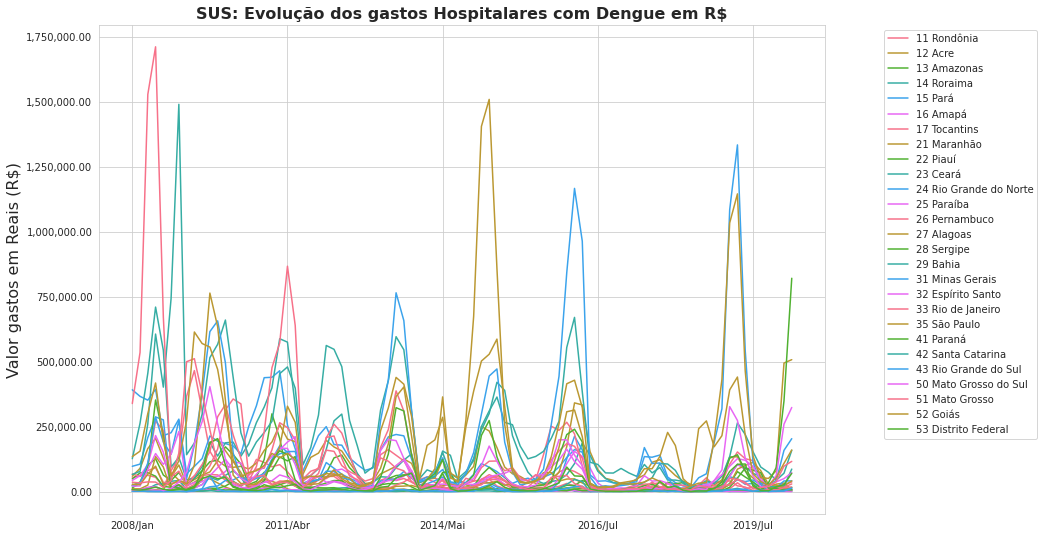

In [217]:
#Criando o gráfico
ax = usaveis_dengue.T.plot(figsize=(13,9))

#Organizando a legenda e os tickers do eixo y
ax.legend(loc='best', bbox_to_anchor=(0.8, 0.5, 0.5, 0.5))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

#selecionando a paleta de cores
sns.set_palette(sns.color_palette("husl"))

#definindo o estido do fundo do gráfico
ax = sns.set_style("whitegrid")

#Editando as legendas
plt.title("SUS: Evolução dos gastos Hospitalares com Dengue em R$", size=16, weight='bold' )
plt.ylabel("Valor gastos em Reais (R$)", size = 16)

#Plotando a imagem
plt.show()


Gráfico geral apenas para analisar a flutuação dos dados com dengue. É possível observar a distribuição sazonal dos gastos. Aumentos sempre em períodos de verão.

In [218]:
#Selecionando apenas os dados do sudeste para melhor visualização dos dados
sudeste_dengue = usaveis_dengue.loc[['32 Espírito Santo', '33 Rio de Janeiro', '35 São Paulo', '31 Minas Gerais']]


#Selecionando os dados gerais do sudeste para melhor visualização dos dados
sudeste = usaveis_final.loc [['32 Espírito Santo', '33 Rio de Janeiro',
                              '35 São Paulo', '31 Minas Gerais']]


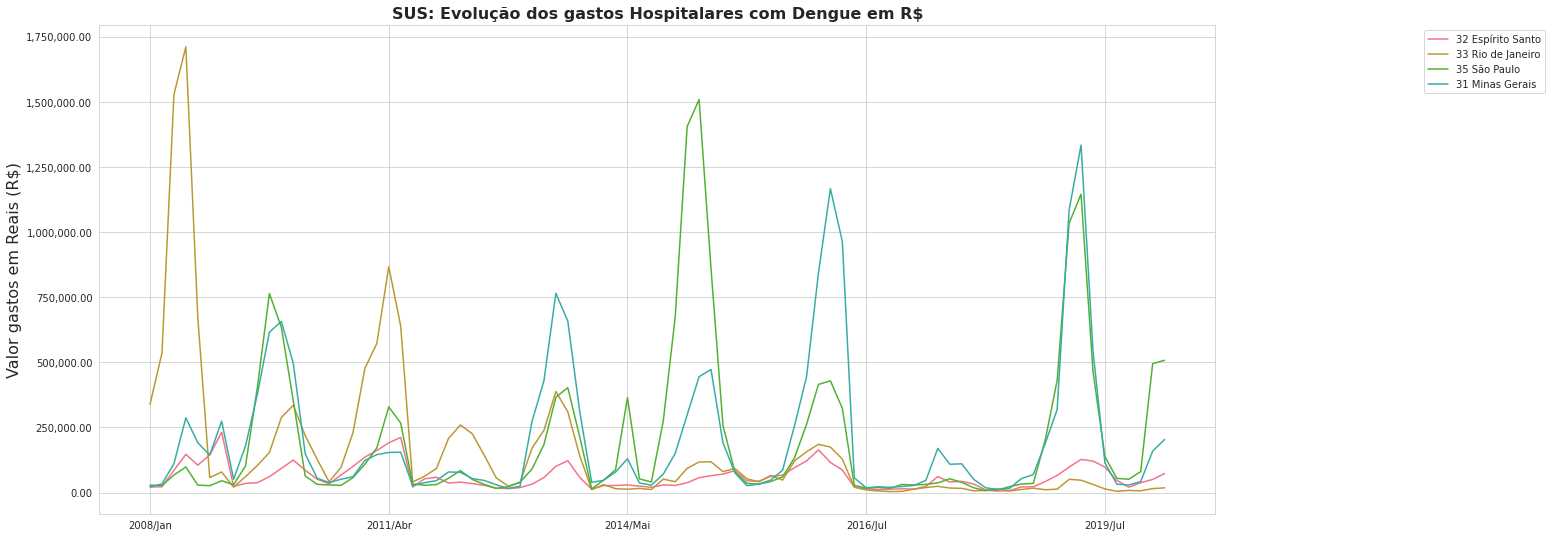

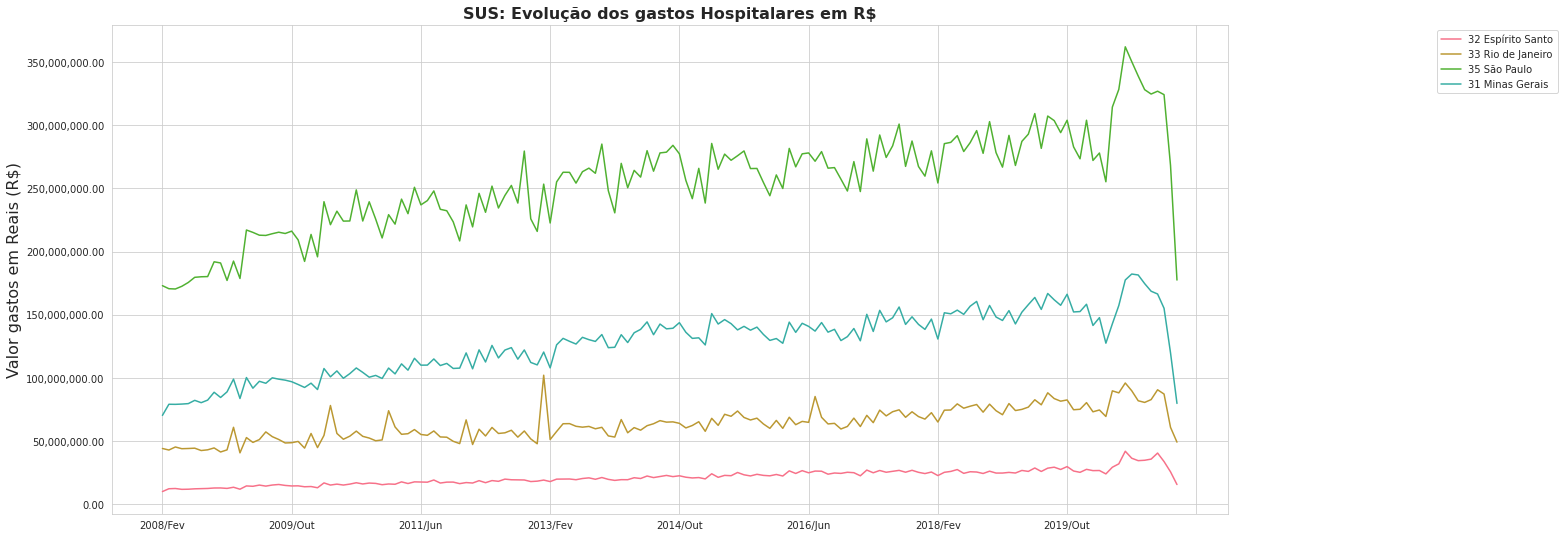

In [219]:
#Criando o gráfico
ax = sudeste_dengue.T.plot(figsize=(20,9))

#Organizando a legenda e os tickers do eixo y
ax.legend(loc='best', bbox_to_anchor=(0.8, 0.5, 0.5, 0.5))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

#selecionando a paleta de cores
sns.set_palette(sns.color_palette("husl"))

#definindo o estido do fundo do gráfico
ax = sns.set_style("whitegrid")

#Editando as legendas
plt.title("SUS: Evolução dos gastos Hospitalares com Dengue em R$", size=16, weight='bold' )
plt.ylabel("Valor gastos em Reais (R$)", size = 16)

#Plotando a imagem
plt.show()


#Criando o gráfico
ax = sudeste.T.plot(figsize=(20,9))

#Organizando a legenda e os tickers do eixo y
ax.legend(loc='best', bbox_to_anchor=(0.8, 0.5, 0.5, 0.5))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

#selecionando a paleta de cores
sns.set_palette(sns.color_palette("husl"))

#definindo o estido do fundo do gráfico
ax = sns.set_style("whitegrid")

#Editando as legendas
plt.title("SUS: Evolução dos gastos Hospitalares em R$", size=16, weight='bold' )
plt.ylabel("Valor gastos em Reais (R$)", size = 16)

#Plotando a imagem
plt.show()

Infelizmente os dados sobre gastos com dengue não foram fornecidos em vários meses. Contudo podemos observar períodos de crescimento de gastos similares nos dois gráficos. Os picos observados, por exemplo em fev/2013 em SP e no RJ também ocorrem nos gastos com dengue. 

Porem, só a dengue não explica esse aumento já que, no RJ, por exemplo no verão de 2012/2013 o aumento do orçamento foi de aproximadamente 50 milhões de reais enquanto os gastos com dengue foram à ordem de pouco menos de meio milhão.

Na totalidade o aumento de gastos hospitalares com dengue raramente passaram da ordem de 1.5 milhões de reais (Rj 2008e SP entre 2015 e 2016). Ou seja, os picos de muitos milhoes de aumento de gastos hospitalares estão possivelmente relacionados a muitos outros fatores.

#Desafio 06: Plotar o gráfico dos custos apenas dos estados da região sudeste e verificar se os picos de 2013/Fev teve comportamento similar em todos os demais estados da região

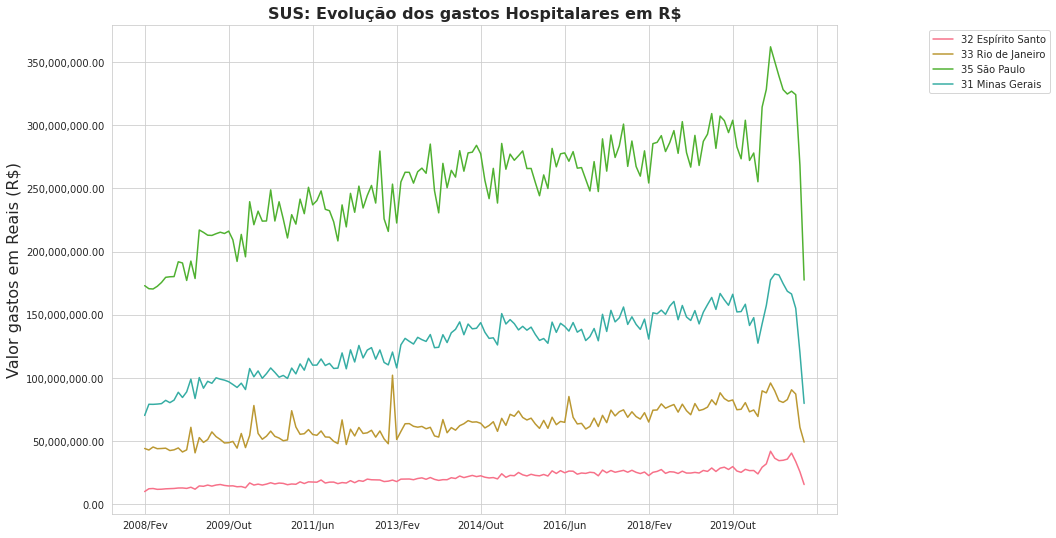

In [220]:
#Criando o gráfico
ax = sudeste.T.plot(figsize=(13,9))

#Organizando a legenda e os tickers do eixo y
ax.legend(loc='best', bbox_to_anchor=(0.8, 0.5, 0.5, 0.5))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

#selecionando a paleta de cores
sns.set_palette(sns.color_palette("husl"))

#definindo o estido do fundo do gráfico
ax = sns.set_style("whitegrid")

#Editando as legendas
plt.title("SUS: Evolução dos gastos Hospitalares em R$", size=16, weight='bold' )
plt.ylabel("Valor gastos em Reais (R$)", size = 16)

#Plotando a imagem
plt.show()


Apenas SP e RJ tiveram um pico nesse periodo, enquanto ES e MG mantiveram uma aparente estabilidade

#Desafio 07: Adicionar seu estado escolhido novamente, deixe o gráfico informativo e tire conclusões sobre seus estados comparando com os demais. Tire suas conclusões e compartilhe com a gente.

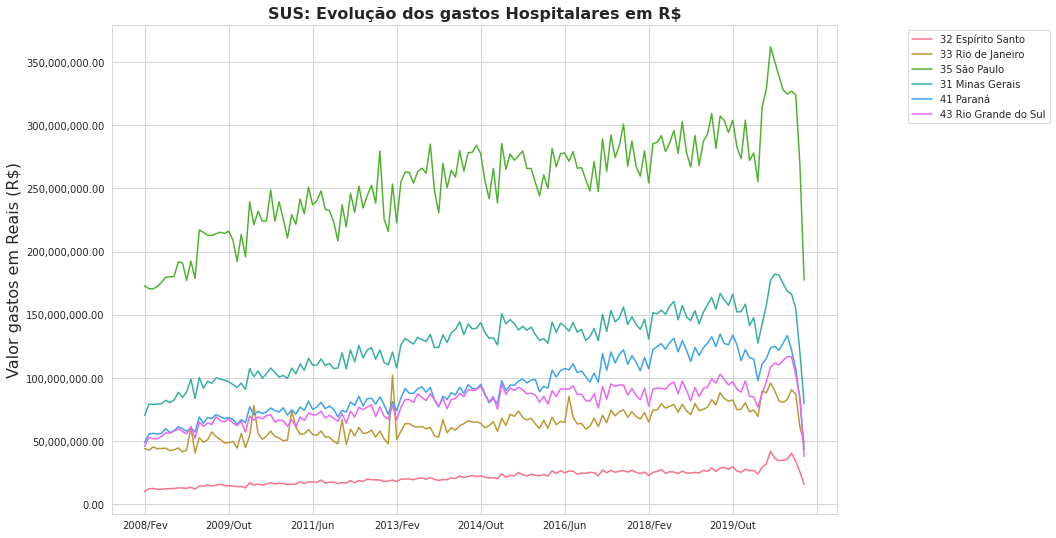

In [221]:
#Criando o gráfico
ax = estados.T.plot(figsize=(13,9))

#Organizando a legenda e os tickers do eixo y
ax.legend(loc='best', bbox_to_anchor=(0.8, 0.5, 0.5, 0.5))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

#selecionando a paleta de cores
sns.set_palette(sns.color_palette("husl"))

#definindo o estido do fundo do gráfico
ax = sns.set_style("whitegrid")

#Editando as legendas
plt.title("SUS: Evolução dos gastos Hospitalares em R$", size=16, weight='bold' )
plt.ylabel("Valor gastos em Reais (R$)", size = 16)

#Plotando a imagem
plt.show()

Comparado com os maiores orçamentos o estado do Espírito Santo apresenta um orçamento bem modesto. 

Os repasses devem seguir um fluxo baseados na população. Além disso, uma população menor é menos suscetível a grandes surtos e quando esses surtos acontecem é mais fácil controlar, por isso não são observados grandes picos de gastos hospitalares como observados nos outros estados. 